<a href="https://colab.research.google.com/github/aksingh21/Probabilistic-Programming-PyMC3/blob/master/pyStanWorkout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pystan

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.


In [0]:

fit = sm.sampling(data=schools_dat, iter=1000, chains=4)


In [0]:
la = fit.extract(permuted=True)  # return a dictionary of arrays
mu = la['mu']

## return an array of three dimensions: iterations, chains, parameters
a = fit.extract(permuted=False)

In [8]:
print(fit)

Inference for Stan model: anon_model_19a09b474d1901f191444eaf8a6b8ce2.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.59    0.14   4.83  -2.02   4.49   7.61  10.72  17.12   1113    1.0
tau        6.32    0.16   5.06   0.28   2.38   5.22   9.01  19.23    943    1.0
eta[1]     0.44    0.02   0.96  -1.56  -0.15   0.46   1.03    2.3   1929    1.0
eta[2]     0.01    0.02   0.87  -1.74  -0.54 9.1e-3   0.58   1.77   2088    1.0
eta[3]    -0.18    0.02   0.95  -2.05   -0.8  -0.17   0.42   1.76   2070    1.0
eta[4]    -0.03    0.02   0.87  -1.78  -0.61-2.0e-3   0.56   1.65   2028    1.0
eta[5]    -0.32    0.02   0.88  -1.95  -0.92  -0.34   0.23   1.49   1764    1.0
eta[6]    -0.22    0.02   0.89  -1.95  -0.81  -0.23    0.4   1.54   1833    1.0
eta[7]     0.37    0.02   0.89  -1.49  -0.19   0.38   0.95    2.1   1460    1.0
eta[8]     0.

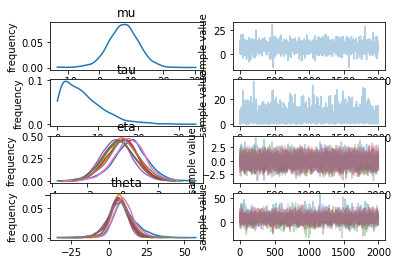

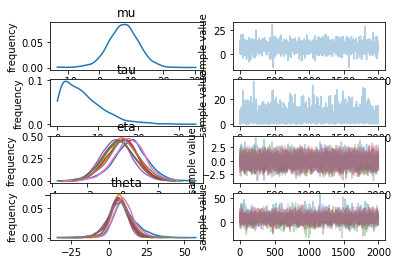

In [9]:
fit.plot()